In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
# combine 

# SGD batch 1 with momentum 
# baseline batch 1 
# baseline momentum

# Adam single with 768neurons
# baseline single
# baseline 768neurons

In [3]:
def val_extractor(file_name1, file_name2, file_name3):    
    
    test_accuracy_seed1 = 0
    sparsity_average_seed1 = 0
    selectivity_average_seed1 = 0
    
    test_accuracy_seed2 = 0
    sparsity_average_seed2 = 0
    selectivity_average_seed2 = 0
    
    test_accuracy_seed3 = 0
    sparsity_average_seed3 = 0
    selectivity_average_seed3 = 0
    
    # index 0 --> test acc (list)
    # index 1 --> sparsity (list) 
    # index 3 --> selectivity (list)
    
    with open(file_name1) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                test_accuracy_seed1 = ast.literal_eval(line)     
            if i == 1:
                sparsity_average_seed1 = ast.literal_eval(line)
            if i == 3:
                selectivity_average_seed1 = ast.literal_eval(line)
                
    with open(file_name2) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                test_accuracy_seed2 = ast.literal_eval(line)     
            if i == 1:
                sparsity_average_seed2 = ast.literal_eval(line)
            if i == 3:
                selectivity_average_seed2 = ast.literal_eval(line)
                
    with open(file_name3) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                test_accuracy_seed3 = ast.literal_eval(line)     
            if i == 1:
                sparsity_average_seed3 = ast.literal_eval(line)
            if i == 3:
                selectivity_average_seed3 = ast.literal_eval(line)
    
    acc_avg = list()
    acc_se  = list()

    spar_avg = list()
    spar_se  = list()

    selec_avg = list()
    selec_se  = list()

    for i in range(len(test_accuracy_seed1)):
        acc_avg.append(np.mean([test_accuracy_seed1[i], test_accuracy_seed2[i], test_accuracy_seed3[i]]))
        acc_se .append(np.std ([test_accuracy_seed1[i], test_accuracy_seed2[i], test_accuracy_seed3[i]]) / np.sqrt(3))

        spar_avg.append(np.mean([sparsity_average_seed1[i], sparsity_average_seed2[i], sparsity_average_seed3[i]]))
        spar_se .append(np.std ([sparsity_average_seed1[i], sparsity_average_seed2[i], sparsity_average_seed3[i]]) / np.sqrt(3))

        selec_avg.append(np.mean([selectivity_average_seed1[i], selectivity_average_seed2[i], selectivity_average_seed3[i]]))
        selec_se .append(np.std ([selectivity_average_seed1[i], selectivity_average_seed2[i], selectivity_average_seed3[i]]) / np.sqrt(3))
    
                
    return acc_avg, acc_se, spar_avg, spar_se, selec_avg, selec_se

In [4]:
# SGD
sgd_b1_acc_avg, sgd_b1_acc_se, sgd_b1_spar_avg, sgd_b1_spar_se, sgd_b1_selec_avg, sgd_b1_selec_se = val_extractor('seed1/seed_1_batchsize_1_50_SGD.txt', 'seed100/seed_100_batchsize_1_50_SGD.txt','seed1234/seed_1234_batchsize_1_50_SGD.txt')
sgd_mo_acc_avg, sgd_mo_acc_se, sgd_mo_spar_avg, sgd_mo_spar_se, sgd_mo_selec_avg, sgd_mo_selec_se = val_extractor('seed1/seed_1_momentum09_SGD.txt', 'seed100/seed_100_momentum09_SGD.txt','seed1234/seed_1234_momentum09_SGD.txt')
sgd_co_acc_avg, sgd_co_acc_se, sgd_co_spar_avg, sgd_co_spar_se, sgd_co_selec_avg, sgd_co_selec_se = val_extractor('seed1/seed_1_combined_batch1_momentum09_SGD.txt', 'seed100/seed_100_combined_batch1_momentum09_SGD.txt','seed1234/seed_1234_combined_batch1_momentum09_SGD.txt')

In [5]:
# Adam 
ada_si_acc_avg, ada_si_acc_se, ada_si_spar_avg, ada_si_spar_se, ada_si_selec_avg, ada_si_selec_se = val_extractor('seed1/seed_1_single_Adam.txt', 'seed100/seed_100_single_Adam.txt', 'seed1234/seed_1234_single_Adam.txt')
ada_nu_acc_avg, ada_nu_acc_se, ada_nu_spar_avg, ada_nu_spar_se, ada_nu_selec_avg, ada_nu_selec_se = val_extractor('seed1/seed_1_768neurons_Adam.txt', 'seed100/seed_100_768neurons_Adam.txt', 'seed1234/seed_1234_768neurons_Adam.txt')
ada_co_acc_avg, ada_co_acc_se, ada_co_spar_avg, ada_co_spar_se, ada_co_selec_avg, ada_co_selec_se = val_extractor('seed1/seed_1_neurons768_single_Adam.txt', 'seed100/seed_100_neurons768_single_Adam.txt', 'seed1234/seed_1234_neurons768_single_Adam.txt')

Text(0.5, 0, 'Epochs')

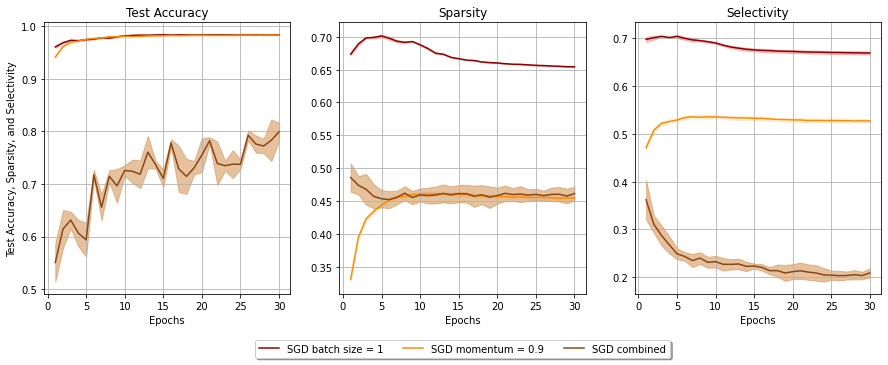

In [10]:
# SGD

e30 = np.linspace(1, 30, 30)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Accuracy
ax1.plot(e30, sgd_b1_acc_avg, c='darkred', label='batch size 1')
ax1.fill_between(e30, np.subtract(sgd_b1_acc_avg, sgd_b1_acc_se), np.add(sgd_b1_acc_avg, sgd_b1_acc_se), color='lightcoral', alpha=0.5)

ax1.plot(e30, sgd_mo_acc_avg, c='darkorange', label='momentum 0.9')
ax1.fill_between(e30, np.subtract(sgd_mo_acc_avg, sgd_mo_acc_se), np.add(sgd_mo_acc_avg, sgd_mo_acc_se), color='moccasin', alpha=0.5)

ax1.plot(e30, sgd_co_acc_avg, c='saddlebrown', label='combined')
ax1.fill_between(e30, np.subtract(sgd_co_acc_avg, sgd_co_acc_se), np.add(sgd_co_acc_avg, sgd_co_acc_se), color='peru', alpha=0.5)

ax1.grid()

# Sparsity
ax2.plot(e30, sgd_b1_spar_avg, c='darkred', label='batch size 1')
ax2.fill_between(e30, np.subtract(sgd_b1_spar_avg, sgd_b1_spar_se), np.add(sgd_b1_spar_avg, sgd_b1_spar_se), color='lightcoral', alpha=0.5)

ax2.plot(e30, sgd_mo_spar_avg, c='darkorange', label='momentum 0.9')
ax2.fill_between(e30, np.subtract(sgd_mo_spar_avg, sgd_mo_spar_se), np.add(sgd_mo_spar_avg, sgd_mo_spar_se), color='moccasin', alpha=0.5)

ax2.plot(e30, sgd_co_spar_avg, c='saddlebrown', label='combined')
ax2.fill_between(e30, np.subtract(sgd_co_spar_avg, sgd_co_spar_se), np.add(sgd_co_spar_avg, sgd_co_spar_se), color='peru', alpha=0.5)

ax2.grid()

# Selectivity 
ax3.plot(e30, sgd_b1_selec_avg, c='darkred', label='SGD batch size = 1')
ax3.fill_between(e30, np.subtract(sgd_b1_selec_avg, sgd_b1_selec_se), np.add(sgd_b1_selec_avg, sgd_b1_selec_se), color='lightcoral', alpha=0.5)

ax3.plot(e30, sgd_mo_selec_avg, c='darkorange', label='SGD momentum = 0.9')
ax3.fill_between(e30, np.subtract(sgd_mo_selec_avg, sgd_mo_selec_se), np.add(sgd_mo_selec_avg, sgd_mo_selec_se), color='moccasin', alpha=0.5)

ax3.plot(e30, sgd_co_selec_avg, c='saddlebrown', label='SGD combined')
ax3.fill_between(e30, np.subtract(sgd_co_selec_avg, sgd_co_selec_se), np.add(sgd_co_selec_avg, sgd_co_selec_se), color='peru', alpha=0.5)

ax3.grid()

ax3.legend(loc='upper center', bbox_to_anchor=(-0.7, -0.15),
          fancybox=True, shadow=True, ncol=4)

ax1.set_title('Test Accuracy')
ax2.set_title('Sparsity')
ax3.set_title('Selectivity')

ax1.set_ylabel('Test Accuracy, Sparsity, and Selectivity')

ax1.set_xlabel('Epochs')
ax2.set_xlabel('Epochs')
ax3.set_xlabel('Epochs')

Text(0, 0.5, 'Test Accuracy, Sparsity, and Selectivity')

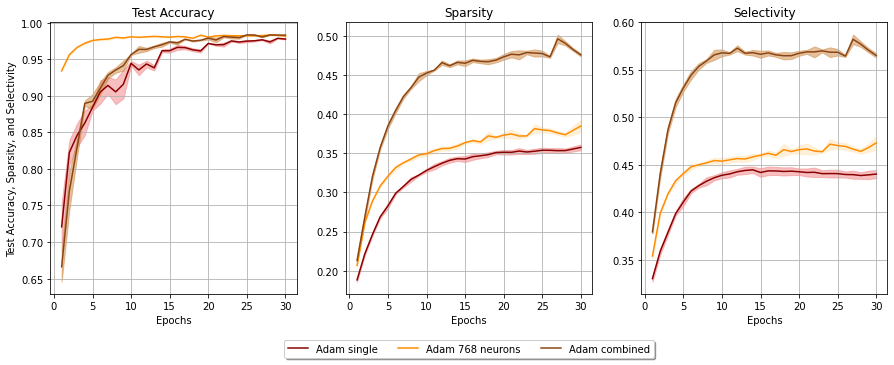

In [12]:
# SGD

e30 = np.linspace(1, 30, 30)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Accuracy
ax1.plot(e30, ada_si_acc_avg, c='darkred', label='single')
ax1.fill_between(e30, np.subtract(ada_si_acc_avg, ada_si_acc_se), np.add(ada_si_acc_avg, ada_si_acc_se), color='lightcoral', alpha=0.5)

ax1.plot(e30, ada_nu_acc_avg, c='darkorange', label='768 neurons')
ax1.fill_between(e30, np.subtract(ada_nu_acc_avg, ada_nu_acc_se), np.add(ada_nu_acc_avg, ada_nu_acc_se), color='moccasin', alpha=0.5)

ax1.plot(e30, ada_co_acc_avg, c='saddlebrown', label='combined')
ax1.fill_between(e30, np.subtract(ada_co_acc_avg, ada_co_acc_se), np.add(ada_co_acc_avg, ada_co_acc_se), color='peru', alpha=0.5)

ax1.grid()

# Sparsity
ax2.plot(e30, ada_si_spar_avg, c='darkred', label='single')
ax2.fill_between(e30, np.subtract(ada_si_spar_avg, ada_si_spar_se), np.add(ada_si_spar_avg, ada_si_spar_se), color='lightcoral', alpha=0.5)

ax2.plot(e30, ada_nu_spar_avg, c='darkorange', label='768 neurons')
ax2.fill_between(e30, np.subtract(ada_nu_spar_avg, ada_nu_spar_se), np.add(ada_nu_spar_avg, ada_nu_spar_se), color='moccasin', alpha=0.5)

ax2.plot(e30, ada_co_spar_avg, c='saddlebrown', label='combined')
ax2.fill_between(e30, np.subtract(ada_co_spar_avg, ada_co_spar_se), np.add(ada_co_spar_avg, ada_co_spar_se), color='peru', alpha=0.5)

ax2.grid()

# Selectivity 
ax3.plot(e30, ada_si_selec_avg, c='darkred', label='Adam single')
ax3.fill_between(e30, np.subtract(ada_si_selec_avg, ada_si_selec_se), np.add(ada_si_selec_avg, ada_si_selec_se), color='lightcoral', alpha=0.5)

ax3.plot(e30, ada_nu_selec_avg, c='darkorange', label='Adam 768 neurons')
ax3.fill_between(e30, np.subtract(ada_nu_selec_avg, ada_nu_selec_se), np.add(ada_nu_selec_avg, ada_nu_selec_se), color='moccasin', alpha=0.5)

ax3.plot(e30, ada_co_selec_avg, c='saddlebrown', label='Adam combined')
ax3.fill_between(e30, np.subtract(ada_co_selec_avg, ada_co_selec_se), np.add(ada_co_selec_avg, ada_co_selec_se), color='peru', alpha=0.5)

ax3.legend()
ax3.grid()

ax1.set_title('Test Accuracy')
ax2.set_title('Sparsity')
ax3.set_title('Selectivity')

ax1.set_xlabel('Epochs')
ax2.set_xlabel('Epochs')
ax3.set_xlabel('Epochs')

ax3.legend(loc='upper center', bbox_to_anchor=(-0.7, -0.15),
          fancybox=True, shadow=True, ncol=4)

ax1.set_ylabel('Test Accuracy, Sparsity, and Selectivity')